/tmp/ipykernel_5465/3847511232.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Yes': True, 'No': False}, inplace=True)


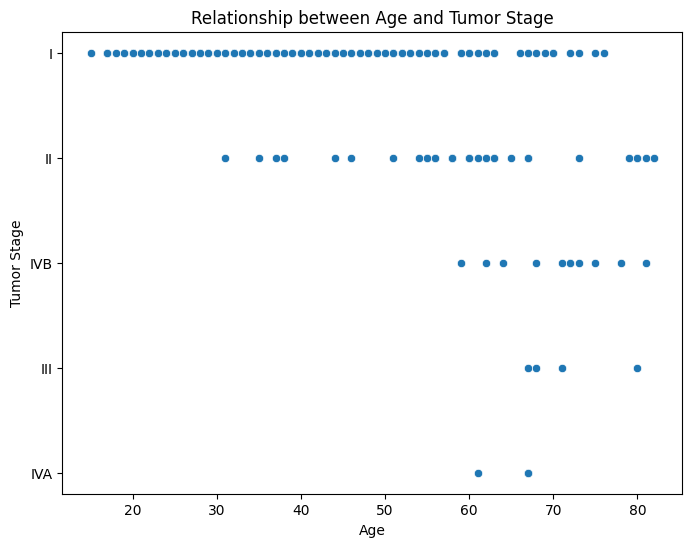

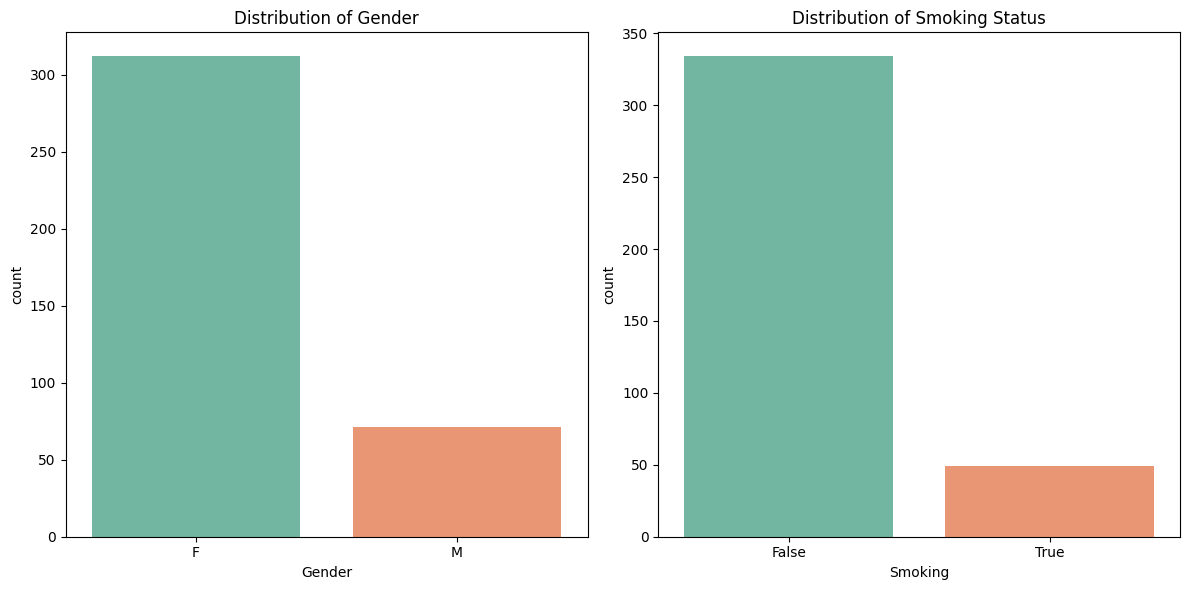

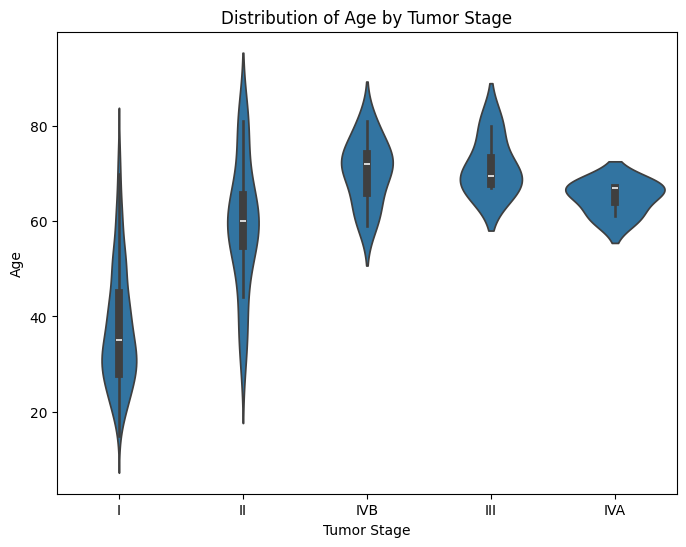


Summary Statistics:
                  Age
count     383.000000
mean       40.866841
std        15.134494
min        15.000000
25%        29.000000
50%        37.000000
75%        51.000000
max        82.000000
skewness    0.719732
kurtosis   -0.271541

Correlation Matrix:
      Age
Age  1.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("thyroid_disease_data.csv")

# Clean the data
data.replace({'Yes': True, 'No': False}, inplace=True)


def create_relational_graph(data):
    """
    Create a relational graph to visualize the relationship between age and tumor stage.

    Parameters:
    data (pd.DataFrame): Input dataset.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Age', y='Stage', data=data)
    plt.title('Relationship between Age and Tumor Stage')
    plt.xlabel('Age')
    plt.ylabel('Tumor Stage')
    plt.show()


create_relational_graph(data)


def create_categorical_graph(data):
    """
    Create a categorical graph to compare the distribution of gender and smoking status.

    Parameters:
    data (pd.DataFrame): Input dataset.

    Returns:
    None
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(x='Gender', hue='Gender', data=data, palette='Set2', legend=False)
    plt.title('Distribution of Gender')

    plt.subplot(1, 2, 2)
    sns.countplot(x='Smoking', hue='Smoking', data=data, palette='Set2', legend=False)
    plt.title('Distribution of Smoking Status')

    plt.tight_layout()
    plt.show()


create_categorical_graph(data)


def create_statistical_graph(data):
    """
    Create a statistical graph to show the distribution of tumor stage using a violin plot.

    Parameters:
    data (pd.DataFrame): Input dataset.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    sns.violinplot(x='Stage', y='Age', data=data)
    plt.title('Distribution of Age by Tumor Stage')
    plt.xlabel('Tumor Stage')
    plt.ylabel('Age')
    plt.show()


create_statistical_graph(data)


def calculate_statistical_moments(data):
    """
    Calculate summary statistics and correlation matrix for numerical columns.

    Parameters:
    data (pd.DataFrame): Input dataset.

    Returns:
    moments (pd.DataFrame): Summary statistics for numerical columns.
    correlation_matrix (pd.DataFrame): Correlation matrix for numerical columns.
    """
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

    moments = data[numerical_columns].describe()

    # Calculate skewness and kurtosis
    skewness = data[numerical_columns].skew()
    kurtosis = data[numerical_columns].kurtosis()

    # Add skewness and kurtosis to moments dataframe
    moments.loc['skewness'] = skewness
    moments.loc['kurtosis'] = kurtosis

    # Calculate correlation matrix
    correlation_matrix = data[numerical_columns].corr()

    return moments, correlation_matrix


# Calculate statistical moments
moments, correlation_matrix = calculate_statistical_moments(data)

# Print summary statistics and correlation matrix
print("\nSummary Statistics:\n", moments)
print("\nCorrelation Matrix:\n", correlation_matrix)


In [4]:
def analyze_data(data):
    """
    Analyze the dataset by summarizing statistics for numerical columns
    and plotting mini plots for categorical columns.

    Parameters:
    data (pd.DataFrame): Input dataset.

    Returns:
    None
    """
    # Summary statistics for numerical columns
    numerical_columns = data.select_dtypes(include=['int', 'float']).columns
    print("\nSummary Statistics:")
    print(data[numerical_columns].describe())

    # Correlation matrix for numerical columns
    correlation_matrix = data[numerical_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

    # Value counts for categorical columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    for i, column in enumerate(categorical_columns):
        print(f"\nValue Counts for {column}:")
        print(data[column].value_counts())

# Analyze the dataset
analyze_data(data)


Summary Statistics:
              Age
count  383.000000
mean    40.866841
std     15.134494
min     15.000000
25%     29.000000
50%     37.000000
75%     51.000000
max     82.000000

Correlation Matrix:
     Age
Age  1.0

Value Counts for Gender:
Gender
F    312
M     71
Name: count, dtype: int64

Value Counts for Thyroid Function:
Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

Value Counts for Physical Examination:
Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

Value Counts for Adenopathy:
Adenopathy
False        277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64

Value Counts fo